<h1 style='text-align: center;'> Final Project 4 : Clustering with K-Means Clustering </h1>

## Created by: Kelompok 9
### Class: PYTN-KS18

- 👤 **Member 1:** Vincent Tanaka - PYTN-KS18-013
- 👤 **Member 2:** Audris Vondrea Wirduno - PYTN-KS18-02


## a. Introduction

### Brief

<div align="justify">

*Project* ini akan membahas mengenai penggunaan *clustering* yang merupakan teknik *unsupervised machine learning* pada *dataset* pengguna kartu kredit yang terdiri dari ***9000*** pengguna. Hasil akhir yang diharapkan adalah untuk mendapatkan strategi marketing yang efektif dari hasil *clustering* yang dilakukan.

</div>

### a.1 Background

<div align="justify">

Pada *notebook* ini studi kasus yang dibahas berupa prilaku **9000** pengguna kartu kredit aktif dalam waktu 6 Bulan. Dengan jumlah variabel sebanyak **18**. Hasil yang diharapkan dari studi kasus ini dalah untuk membuat sebuah strategi marketing dari *clustering* yang akan dilakukan setelahnya.  
Data didapatkan dari kaggle dengan link : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

</div>

### a.2 About Dataset

Berikut adalah deskripsi **18** variabel dari *dataset* yang akan digunakan:  
1. **CUSTID** - Identification of Credit Card holder (Categorical)
2. **BALANCE** - Balance amount left in their account to make purchases
3. **BALANCEFREQUENCY** - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. **PURCHASES** - Amount of purchases made from account
5. **ONEOFFPURCHASES** - Maximum purchase amount done in one-go
6. **INSTALLMENTSPURCHASES** - Amount of purchase done in installment
7. **CASHADVANCE** - Cash in advance given by the user
8. **PURCHASESFREQUENCY** - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. **ONEOFFPURCHASESFREQUENCY** - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. **PURCHASESINSTALLMENTSFREQUENCY** - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. **CASHADVANCEFREQUENCY** - How frequently the cash in advance being paid
12. **CASHADVANCETRX** - Number of Transactions made with "Cash in Advance"
13. **PURCHASESTRX** - Number of purchase transactions made
14. **CREDITLIMIT** - Limit of Credit Card for user
15. **PAYMENTS** - Amount of Payment done by user
16. **MINIMUM_PAYMENTS** - Minimum amount of payments made by user
17. **PRCFULLPAYMENT** - Percent of full payment paid by user
18. **TENURE** - Tenure of credit card service for user

### a.3 Project Objectives

Adapun *Objective* dari pengerjaan *final project* ini yaitu :  
1. Melakukan eksplorasi data mengenai hubungan antar variabel dari data.
2. Melakukan *preprocessing data* sebelum pemodelan data.
3. Melakukan pemodelan data *clustering* yang sudah ditentukan
4. Mengambil kesimpulan dari apa yang sudah dilakukan.

## b. Import Libraries

In [1]:
# import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import time
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## c. *Dataset Loading*

In [2]:
# Import the dataset given, name it as df
df = pd.read_csv('cc-dataset.zip',compression='zip')

In [3]:
# Show top 5 row of df
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.shape

(8950, 18)

<div align="justify">

Disini bisa disimpulkan bahwa *dataset* yang akan digunakan memiliki data sebanyak **8950** baris dengan jumlah variabel sebanyak **18** kolom.

</div>

## d. Data Cleaning

### d.1 Duplicate Data Handling

In [6]:
# Check if there's a duplicated data
df.duplicated().sum()

0

Dari hasil pengecekan tidak ada data duplikat pada *dataset* ini, proses dilanjut dengan meng-*handle missing values*.

### d.2 Missing Data Handling

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat **2** kolom yang memiliki *missing values*, yaitu **CREDIT_LIMIT(1 missing value)** dan **MINIMUM_PAYMENTS(313 missing values)**. Maka dari itu data tersebut akan dihandle menggunakan inputasi. Pertama-tama bisa dicek terlebih dahulu distribusi data pada kedua kolom tersebut.

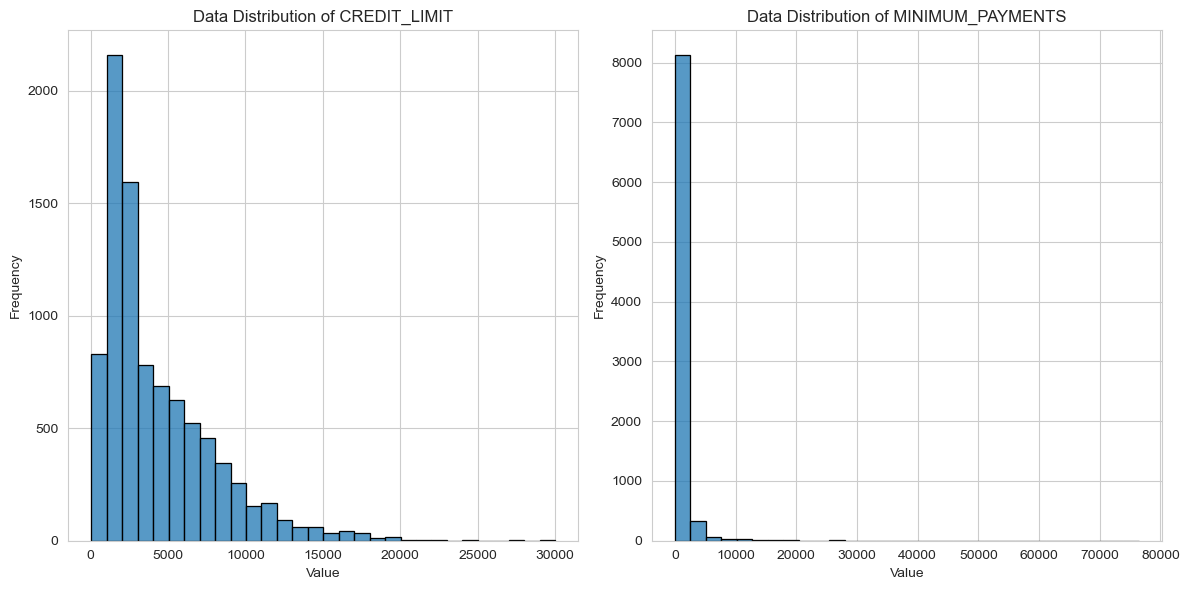

In [8]:
# List of columns with missing values to plot
columns_to_plot = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and set its size
plt.figure(figsize=(12, 6))

# Loop through the missing value columns list and create a subplot for each
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 2, i)  # 1 row, 2 columns, subplot index
    sns.histplot(df[column].dropna(), bins=30, kde=False, edgecolor='black')
    plt.title(f'Data Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Dari hasil ini bisa disimpulkan bahwa distribusi data kedua kolom yang memiliki *missing values* cenderung ke *right-skewed* dimana nilai *mean* < nilai *median*. Dengan kondisi tersebut data yang kosong akan diisi dengan nilai median dikarenakan distribusi data tidak normal.

In [9]:
# define a list of columns that need to be filled with median number
columns_to_fill = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

for columns in columns_to_fill:
    median_value = df[columns].median()
    df[columns].fillna(median_value, inplace=True)

# Verify if NaN values have been filled
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Disini data sudah tidak memiliki nilai kosong, proses bisa dilanjut dengan membuang kolom yang tidak diperlukan.

### d.3 Dropping un-needed Columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Dari hasil tampilan *dataframe*, bisa disimpulkan bahwa kolom **CUST_ID** merupakan sebuah *primary key* dari *dataset*. Dikarenakan nilai didalamnya merupakan *unique value* yang berjumlah sebanyak **8950** *unique values*, maka kelompok 9 akan menetapkan bahwa kolom ini akan dibuang.

In [12]:
df.drop(columns='CUST_ID', inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Sekarang, data uang akan digunakan hanya terdiri dari **17** kolom saja. Proses bisa dilanjutkan dengan melakukan *EDA*.

## e. Explanatory Data Analysis

### e.1 Measure of Central Tendency

In [13]:
# Calculate the Central Tendency of each numerical columns
central_tendency = df.describe().T
central_tendency.reset_index().rename(
    columns={'index': 'Attributes'})

,Attributes,count,mean,std,min,25%,50%,75%,max
0,BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
1,BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
2,PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
3,ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
4,INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
5,CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
6,PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
7,ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
8,PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
9,CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


*DataFrame* tersebut menghitung beberapa *measure of central tendency* untuk setiap kolom yang memiliki tipe data numerik. *Measure of central tendency* yang dihitung melibatkan statistik deskriptif dasar, termasuk *mean* (rata-rata), *std* (standar deviasi), *min* (nilai minimum), 25% (kuartil pertama), 50% (median atau kuartil kedua), 75% (kuartil ketiga), dan *max* (nilai maksimum). *DataFrame* ini memberikan gambaran singkat tentang sebaran nilai di setiap kolom dan membantu dalam memahami *central tendency* dari dataset tersebut.

### e.2 Measure of Central Tendency

In [14]:
# Create a dataframe that only contains numeric columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numerical_columns]

In [15]:
# Compute some measure of variability
range_values = numeric_df.max() - numeric_df.min()
variance_values = numeric_df.var()
std_deviation_values = numeric_df.std()
iqr_values = numeric_df.quantile(0.75) - numeric_df.quantile(0.25)
cv_values = std_deviation_values / numeric_df.mean()

In [16]:
# Combine the results into one dataframe
variability_measures = pd.DataFrame({
    'Range': range_values,
    'Variance': variance_values,
    'Std Deviation': std_deviation_values,
    'IQR': iqr_values,
    'CV': cv_values
})
variability_measures.head()

,Range,Variance,Std Deviation,IQR,CV
BALANCE,19043.13856,4.332775e+06,2081.531879,1925.858120,1.330499
BALANCE_FREQUENCY,1.00000,5.612351e-02,0.236904,0.111111,0.270047
PURCHASES,49039.57000,4.565208e+06,2136.634782,1070.495000,2.129809
ONEOFF_PURCHASES,40761.25000,2.755228e+06,1659.887917,577.405000,2.801795
INSTALLMENTS_PURCHASES,22500.00000,8.178274e+05,904.338115,468.637500,2.199974


Dalam hasil diatas, telah dihitung beberapa ukuran variabilitas (*measure of variability*) untuk kolom-kolom numerik pada dataset pengguna kartu kredit dari *Kaggle*. Ini mencakup *Range* (Rentang), *Variance* (Varians), *Std Deviation* (Deviasi Standar), IQR (*Interquartile Range*), dan CV (*Coefficient of Variation*). Hasil ini memberikan gambaran tentang sebaran dan variasi data keuangan, seperti rentang batas kredit, variasi nilai transaksi, dan konsistensi tagihan. DataFrame yang dihasilkan menyajikan nilai-nilai tersebut untuk setiap kolom numerik dalam dataset, memberikan wawasan komprehensif terhadap karakteristik variabilitas data keuangan.

### e.3 Simple Data Plotting

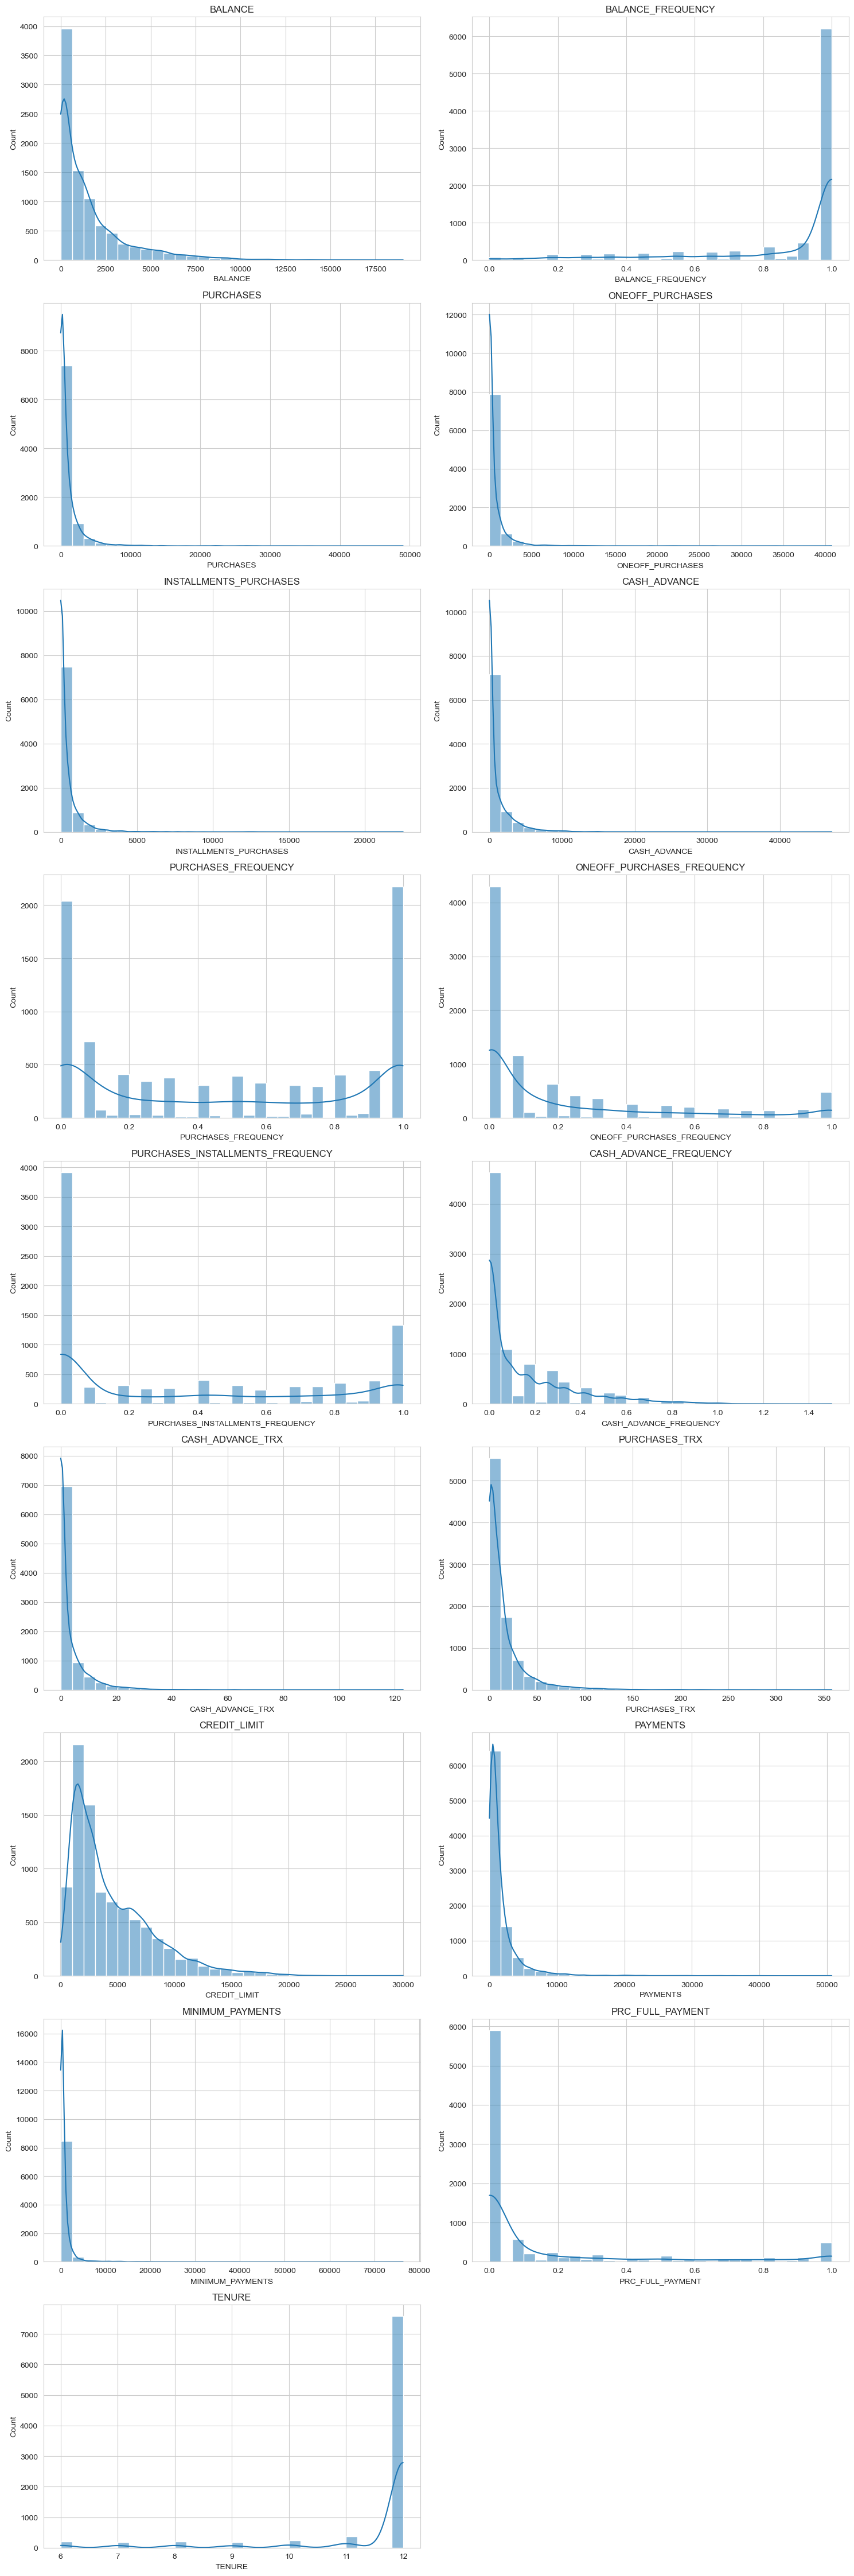

In [17]:
# List of your DataFrame's columns
columns = df.columns

# Determine the number of rows/columns for the subplot grid
n_rows = (len(columns) + 1) // 2
n_cols = 2

# Create a figure and a set of subplots
plt.figure(figsize=(15, 5 * n_rows))

for i, column in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    # Check if the data is numerical or categorical
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], kde=True, bins=30)
    else:
        sns.countplot(x=column, data=df)
    plt.title(column)
    plt.tight_layout()

plt.show()

Hasil *plot* diatas merupakan distribusi data yang ada pada tiap kolom *dataset*. Ada beberapa hal yang bisa disimpulkan dari hasil ini yaitu:
- Banyak kolom yang memiliki grafik *right-skewed* dimana data-data tersebut memiliki nilai mean < dari nilai mediannya.
- Pada kolom **'BALANCE'** dan **'BALANCE_FREQUENCY'** bisa disimpulkan bahwa para pengguna kartu kredit rajin dalam membayar kredit mereka bisa dilihar dengan kolom **'BALANCE'** yang sering muncul adalah 0. Diikuti dengan kolom **'BALANCE_FREQUENCY'** yang memiliki mayoritas nilai 1.0 yang membuktikan berapa seringnya kartu kredit tersebut digunakan.
- Pada kolom **'TENURE'** bisa disimpulkan bahwa pengguna kartu kredit, lebih memilih pembayaran selama 12 bulan dalam kreditnya meskipun biasanya pembayaran dengan bulan yang lebih lama itu jauh lebih mahal di suku bunganya.

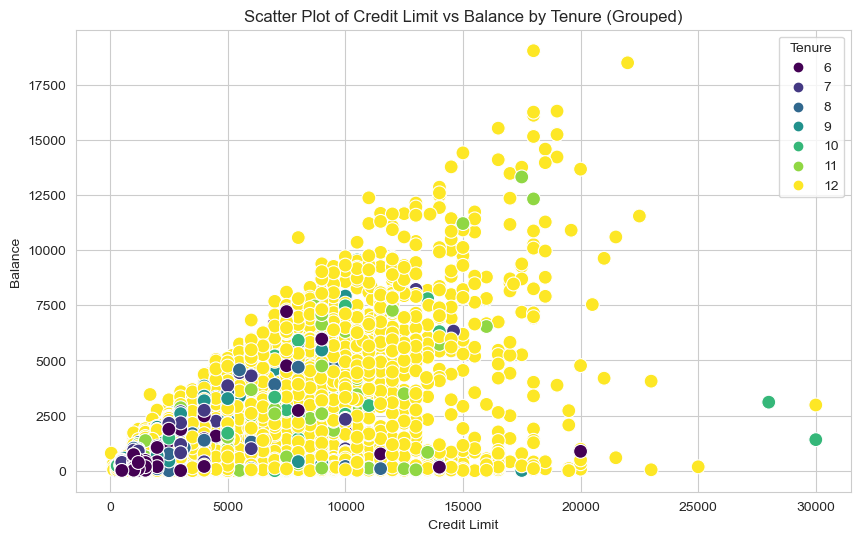

In [18]:
# Create a scatter plot of CREDIT_LIMIT vs BALANCE with a hue based on TENURE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='BALANCE', hue='TENURE', palette='viridis', s=100)

# Add plot title and labels
plt.title('Scatter Plot of Credit Limit vs Balance by Tenure (Grouped)')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend(title='Tenure')

# Show the plot
plt.show()

Bisa dilihat dari pesebaran data berdasarkan kolom **'BALANCE'** dan **'CREDIT_LIMIT'** pengguna lebih banyak menggunakan TENURE selama 12 bulan. Dibuktikan dari titik bewarna kuning pada plot ini.

## f. Data Preprocessing

### f.1 Correlation Check

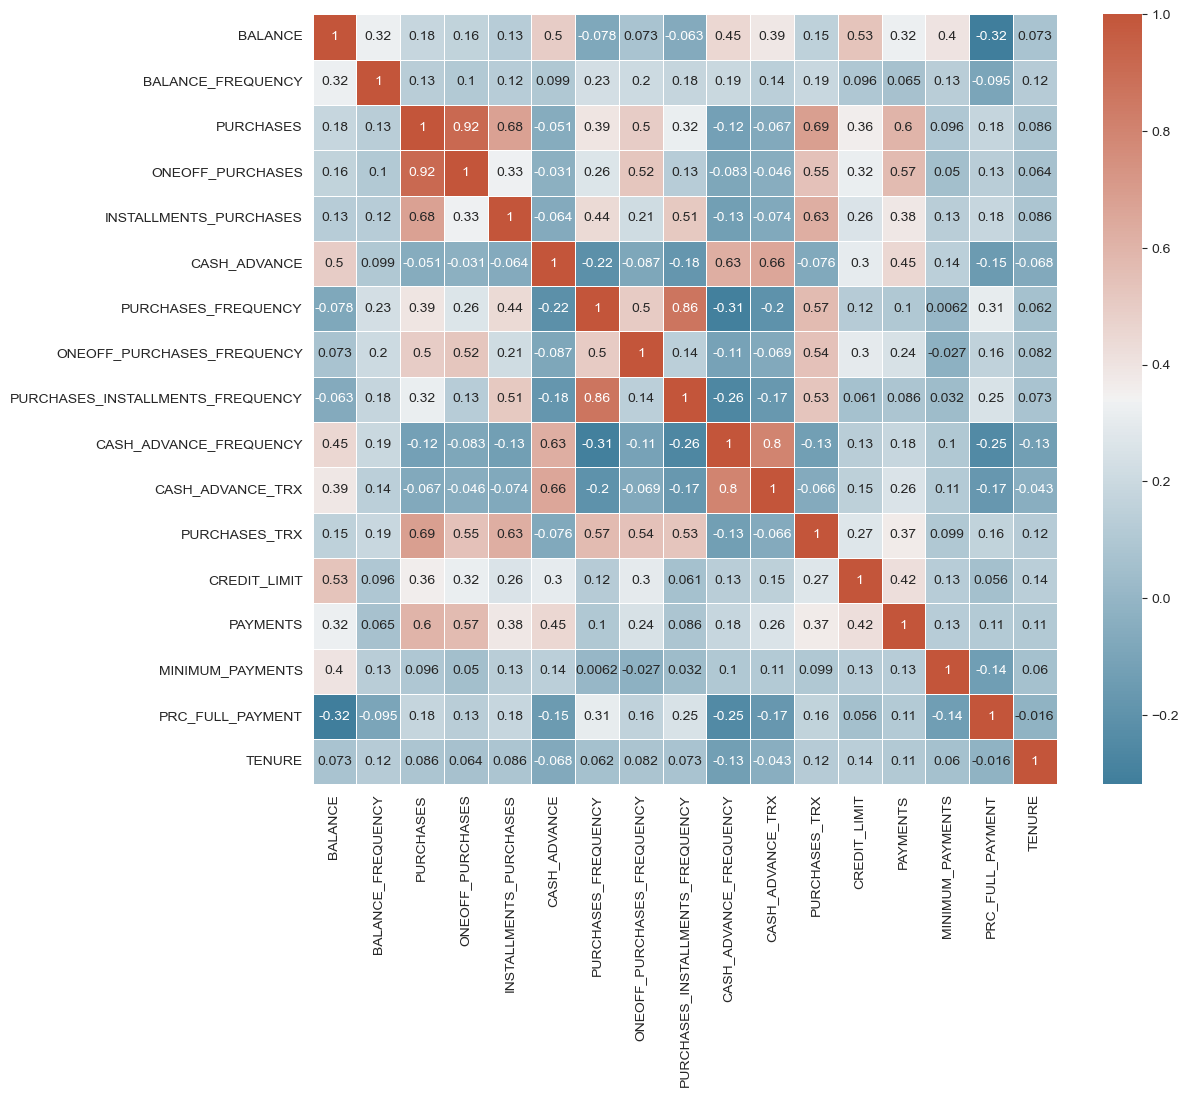

In [19]:
corr = df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Choose a diverging color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Generate a heatmap
sns.heatmap(corr, annot=True, cmap=cmap, linewidths=.5)
# Show the plot
plt.show()

Berikut adalah hasil *plot* korelasi yang dilakukan pada *DataFrame* menggunakan *Heatmap* dimana warna korelasi yang mengarah ke angka (1.0) atau merah menunjukkan berapa positifnya korelasi antar kolom yang ada *DataFrame*. Begitu sebaliknya dengan yang mengarak ke angka (0.) atay biru yang menunjukkan bahwa kolom tersebut memiliki korelasi negatif atau tidak berhubungan satu sama lain. Disini ada 1 kolom yang memiliki korelasi yang sangat kuat dengan kolom lainnya dengan nilai korelasi sebanyak **0.92** yaitu **'ONEOFF_PURCHASES'**.

### f.2 *Standardization*

<div align='justify'>
Proses selanjutnya adalah scaling dataset. Disini dataset akan diubah menggunakan transformasi linear untuk menghasilkan cluster yang lebih bagus kualitasnya dengan mengelola variabilitas dataset.Standarisasi dataset akan diharapkan untuk meningkatkan peforma clustering nantinya.
</div>

In [20]:
# Scale the entire column
X = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [21]:
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


### f.3 *Inferential Statistic Test with a Hopkins Test*

Proses selanjutnya adalah untuk melakukan statistik inferensial menggunakan *Test Hopkins* untuk menghitung *clustering tendency*/kecenderungan pengelompokan data sekarang.
Berikut adalah penjelasan Hipotesis Hopkins Test yang akan dilakukan :
- H0: Dataset mungkin diclusterkan (contains meaningful clusters).
- H1: Dataset tidak mungkin diclusterkan (no meaningful clusters).

In [22]:
def hopkins_statistic(X):
    n, d = X.shape
    m = int(0.1 * n)  # considering 10% of the total data
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = np.random.uniform(X.min(), X.max(), (m, d))
    
    uj = np.array([nbrs.kneighbors([rand_X[i]], return_distance=True)[0][0][0] for i in range(m)])
    wj = np.array([nbrs.kneighbors([X.iloc[random.choice(range(n))]], return_distance=True)[0][0][0] for i in range(m)])

    H = np.sum(uj) / (np.sum(uj) + np.sum(wj))
    return H

# Assuming 'X' is your standardized DataFrame
hopkins_score = hopkins_statistic(X)
print("Hopkins statistic:", hopkins_score)

Hopkins statistic: 0.9999999993922384


Hasil pengecekan statistik hopkins diatas, bisa disimpulkan bahwa H0 diterima dimana dataset ini memiliki cluster yang berguna. Proses bisa dilanjut dengan implementasi PCA untuk mereduksi dimensi data.

### f.4 *Dimensionality Reduction with PCA*

*PCA (principal component analysis)* merupakan metode yang biasa digunakan di *unsupervised machine learning* untuk meringkas tabel data multivariat dalam skalar besar sehingga bisa dijadikan variabel yang lebih kecil.

In [23]:
# Instantiate PCA
pca = PCA(n_components=2)

# Apply PCA to the data
X_pca = pca.fit_transform(X)

# Convert to DataFrame for easier analysis
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

## g. *Define the Model*

<div align='justify'>

Disini metode *clustering* yang akan dilakukan adalah *K-Means Clustering*. *K-Means Clustering* adalah metode *unsupervised machine mearning* yang biasa digunakan untuk *clustering*. Biasanya prosedurnya berupa klasifikasi kumpulan data tertentu kedalam sejumlah kluster yang ditentukan dengan huruf 'K' yang telah ditetapkan sebelumnya.  
Sebelum dilakukan clustering, ada tahap yang bisa dilakukan sebelumnya yaitu untuk menentukan nilai K yang paling optimal.

</div>

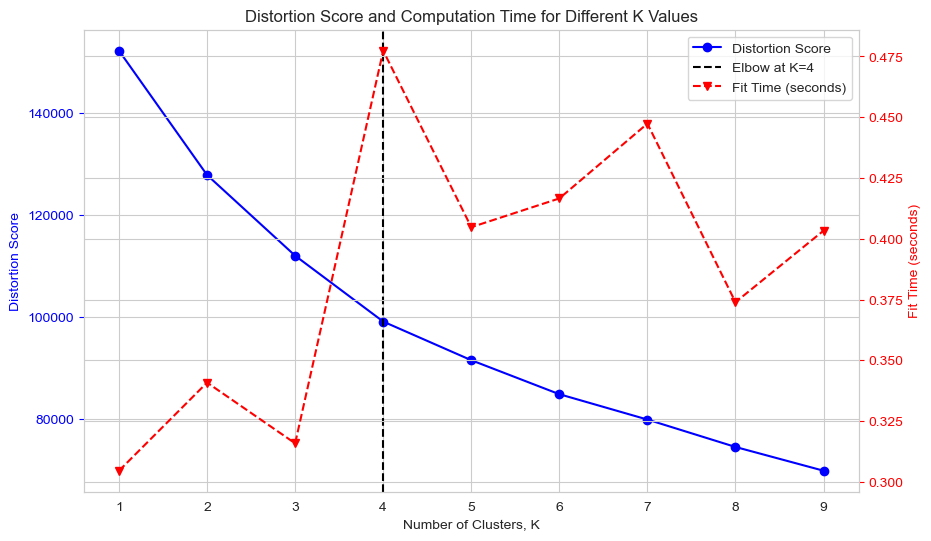

In [24]:
# Range of K values to try
K_range = range(1, 10)

# Lists to store results
inertia = []
times = []

# Compute KMeans and record inertia and time for each k
for k in K_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    end_time = time.time()
    
    # Append inertia and time
    inertia.append(kmeans.inertia_)
    times.append(end_time - start_time)

# Determine the elbow point using the kneed library
kneedle = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
elbow_k = kneedle.elbow

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the inertia (distortion scores)
ax1.plot(K_range, inertia, 'bo-', label='Distortion Score')
ax1.set_xlabel('Number of Clusters, K')
ax1.set_ylabel('Distortion Score', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Distortion Score and Computation Time for Different K Values')

# Adding the Elbow annotation
ax1.axvline(x=elbow_k, color='black', linestyle='--', label=f'Elbow at K={elbow_k}')

# Creating a twin y-axis to plot the computation time
ax2 = ax1.twinx()
ax2.plot(K_range, times, 'rv--', label='Fit Time (seconds)')
ax2.set_ylabel('Fit Time (seconds)', color='r')
ax2.tick_params('y', colors='r')

# Adding legends
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()


Contoh diatas merupakan implemetasi *elbow method* untuk menentukan nilai K terbaik untuk *dataframe* ini. Didapatkan nilai **K** paling optimal adalah **4** cluster.

In [25]:
# Define the model with the optimal value on K
final_kmeans = KMeans(n_clusters=elbow_k, n_init=10, random_state=42)

## h. Train the Model

Disini proses dilanjut dengan melatih model menggunakan variabel yang sudah ditetapkan sebelumnya (X).

In [26]:
# Fit the KMeans model to the PCA-transformed data
final_kmeans.fit(X_pca)

# Assign each data point to a cluster
cluster_assignments = final_kmeans.predict(X_pca)

## i. *Evaluate the Model*

Disini model *K-Means* yang dibuat akan dievaluasi menggunakan *plotting* dan dibandingkan dengan model *unsupervised machine learning* lainnya.

In [27]:
# Optionally, add the cluster assignments to your DataFrame
X_pca_df['Cluster'] = cluster_assignments

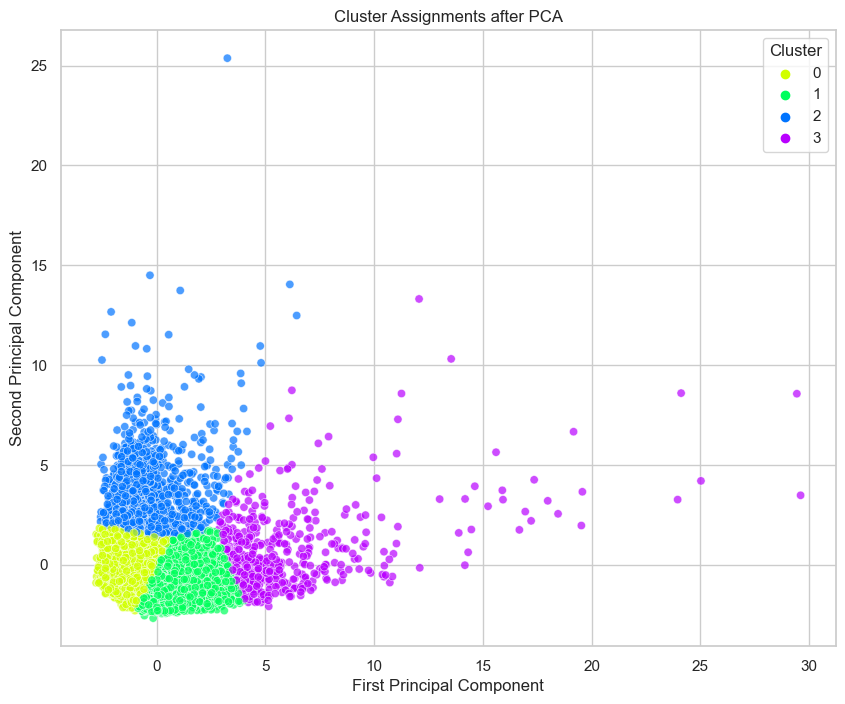

In [28]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 8))

# Plot each cluster with a different color using Seaborn
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', 
                palette=sns.color_palette("hsv", elbow_k),  # Adjust the palette as needed
                data=X_pca_df, legend='full', alpha=0.7)  # alpha is for transparency

# Label the axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Optional: Add a title
plt.title('Cluster Assignments after PCA')

# Show the plot
plt.show()

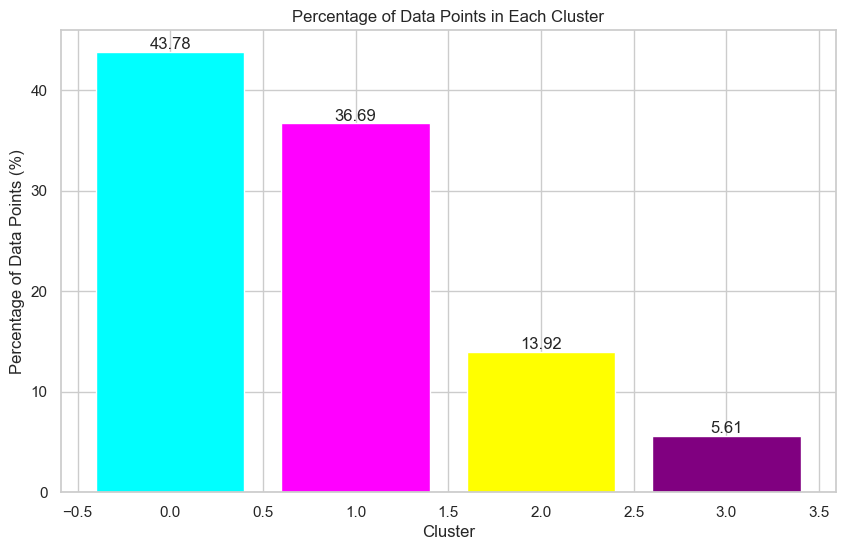

In [29]:
# Calculate cluster counts and percentages
cluster_counts = X_pca_df['Cluster'].value_counts().sort_index()
total_points = len(X_pca_df)
cluster_percentages = (cluster_counts / total_points) * 100

# Different colors for each bar
bar_colors = ['cyan', 'magenta', 'yellow', 'purple']

# Ensure there are enough colors for the number of clusters
bar_colors = bar_colors[:len(cluster_counts)]

# Create a bar plot for cluster percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_percentages, color=bar_colors)

# Add the actual count values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Label the axes
plt.xlabel('Cluster')
plt.ylabel('Percentage of Data Points (%)')

# Optional: Add a title
plt.title('Percentage of Data Points in Each Cluster')

# Show the plot
plt.show()

Hasil diatas merupakan distribusi data yang sudah di-cluster menggunakan K-Means serta persentase dari pengelompokannya. Bisa dilihat bahwa cluster 0.0 memiliki persentase terbanyak yaitu **43,78**. Proses selanjutnya akan mengevaluasi nilai peforma menggunakan *silhouette_score, calinski_harabasz_score, dan davies_bouldin_score*

In [30]:
# Silhouette Score
silhouette_avg = silhouette_score(X_pca, cluster_assignments)
print("Silhouette Score: ", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_assignments)
print("Calinski-Harabasz Index: ", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_pca, cluster_assignments)
print("Davies-Bouldin Index: ", davies_bouldin)

Silhouette Score:  0.40736006359347443
Calinski-Harabasz Index:  5819.167029514591
Davies-Bouldin Index:  0.8009923086671585


<div align='justify'>

kriteria Penilaian masing masing index & Score : 
- Silhouette Score: Higher is better (max = 1, min = -1)
- Canlinski Harabasz scoreL: Higher is better
- Davis-Bouldin Index: Lower is better  

Hasil pengelompokan K-Means secara umum baik, khususnya dalam hal Indeks *Calinski-Harabasz*, yang menunjukkan kelompok-kelompok yang terpisah dengan baik dan padat.
Skor *Silhouette* dan *Indeks Davies-Bouldin* menunjukkan kinerja sedang.

</div>

### i.1 Compare with Another Algorithm

Disini peforma *K-Means clustering* yang dilakukan sebelumnya akan dibandingkan dengan peforma algoritma *clustering* lainnya. Disini algoritma yang akan digunakan untuk dibandingkan adalah *Hierarchical Clustering*.

In [31]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=elbow_k)  # Number of clusters
hierarchical_labels = hierarchical.fit_predict(X_pca)

# Add Hierarchical cluster assignments to DataFrame
X_pca_df['Hierarchical_Cluster'] = hierarchical_labels

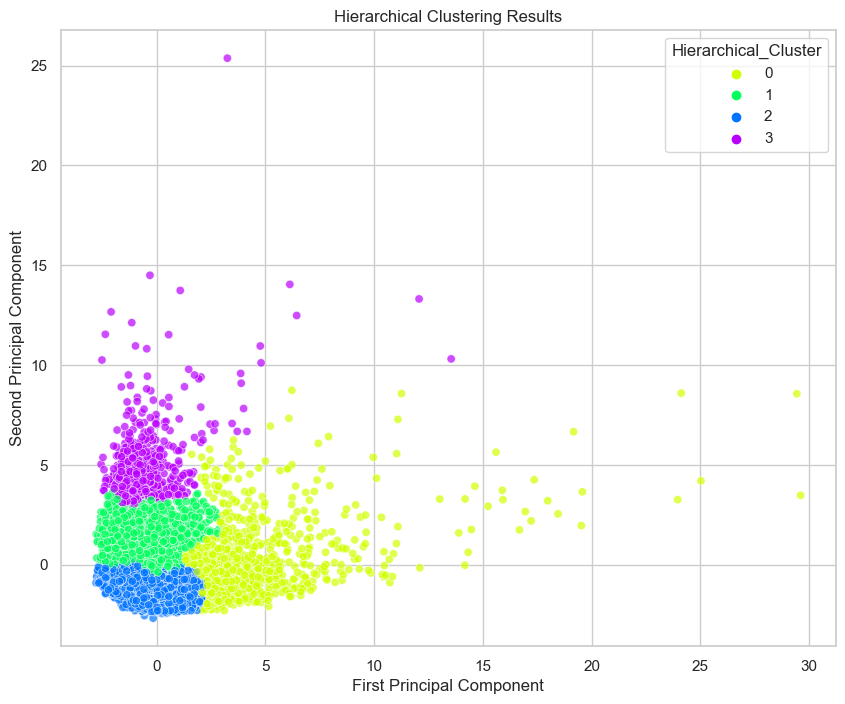

In [32]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Use Seaborn to make the scatter plot
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', 
                palette=sns.color_palette("hsv", n_colors=elbow_k), 
                data=X_pca_df, legend='full', alpha=0.7)

# Label the axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Optional: Add a title
plt.title('Hierarchical Clustering Results')

# Show the plot
plt.show()

In [33]:
# Silhouette Score
silhouette_hierarchical = silhouette_score(X_pca, hierarchical_labels)
print("Silhouette Score (Hierarchical): ", silhouette_hierarchical)

# Calinski-Harabasz Index
calinski_harabasz_hierarchical = calinski_harabasz_score(X_pca, hierarchical_labels)
print("Calinski-Harabasz Index (Hierarchical): ", calinski_harabasz_hierarchical)

# Davies-Bouldin Index
davies_bouldin_hierarchical = davies_bouldin_score(X_pca, hierarchical_labels)
print("Davies-Bouldin Index (Hierarchical): ", davies_bouldin_hierarchical)

Silhouette Score (Hierarchical):  0.34665328791668804
Calinski-Harabasz Index (Hierarchical):  4523.503974003005
Davies-Bouldin Index (Hierarchical):  0.9148039146314784


In [34]:
# Compare both metrics
metrics = {
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'],
    'K-Means': [silhouette_avg, calinski_harabasz, davies_bouldin],
    'Hierarchical': [silhouette_hierarchical, calinski_harabasz_hierarchical, davies_bouldin_hierarchical]
}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df

,Metric,K-Means,Hierarchical
0,Silhouette Score,0.407360,0.346653
1,Calinski-Harabasz Index,5819.167030,4523.503974
2,Davies-Bouldin Index,0.800992,0.914804


Kedua model akan dibandingkan dengan kriteria berikut.  
kriteria Penilaian masing masing index & Score : 
- *Silhouette Score*: Higher is better (max = 1, min = -1)
- *Canlinski Harabasz score*: Higher is better
- *Davis-Bouldin Index*: Lower is better   

Dari hasil ini, bisa disimpulkan bahwa *K-Means* memiliki peforma yang lebih baik dibangindkan dengan *Hierarchical Clustering* dari ketiga *score* tersebut. Maka bisa disimpulkan bahwa kelompok 9 akan memilih algoritma **K-Means Clustering** pada dataset ini.

## j. *Model Inference*

In [35]:
# Select a Random Sample from the PCA-transformed data
sample_size = 100  # Define your desired sample size
indices = np.random.choice(X_pca.shape[0], sample_size, replace=False)
sample_data_pca = X_pca[indices]

# Predicting cluster assignments using K-Means
sample_clusters = final_kmeans.predict(sample_data_pca)

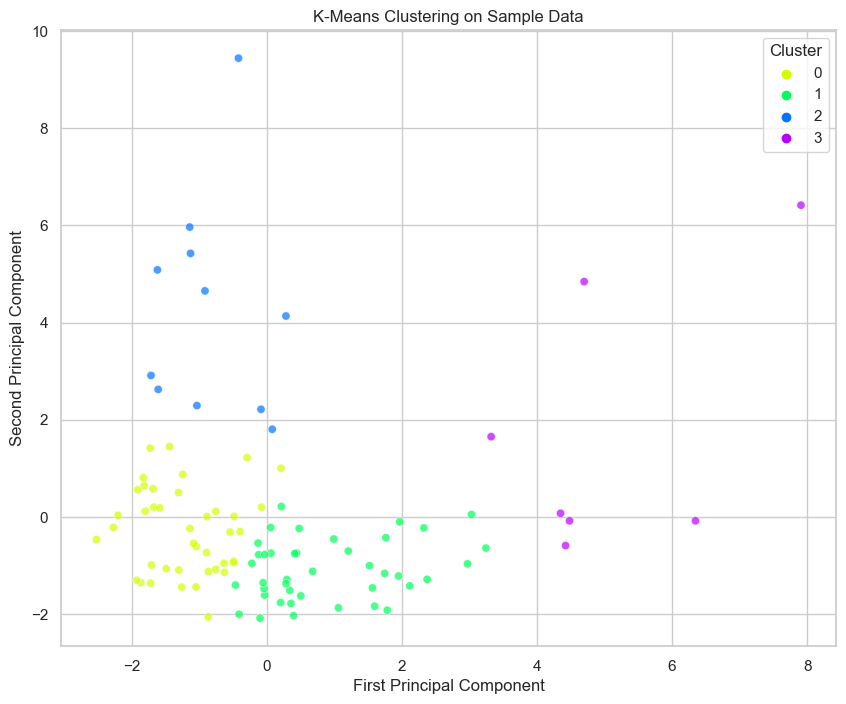

In [36]:
# Create a DataFrame for the sample data for plotting
sample_data_df = pd.DataFrame(sample_data_pca, columns=['PCA1', 'PCA2'])
sample_data_df['Cluster'] = sample_clusters

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Use Seaborn to make the scatter plot
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', 
                palette=sns.color_palette("hsv", n_colors=len(np.unique(sample_clusters))), 
                data=sample_data_df, legend='full', alpha=0.7)

# Label the axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Optional: Add a title
plt.title('K-Means Clustering on Sample Data')

# Show the plot
plt.show()

## k. Conclusion

In [37]:
df['CLUSTER'] = cluster_assignments

In [46]:
# Group data by cluster labels and calculate mean
cluster_means = df.groupby('CLUSTER').mean()

# Step 3: Exclude the 'Cluster' column if it's included in the features
if 'CLUSTER' in cluster_means.columns:
    cluster_means = cluster_means.drop(columns='CLUSTER')

# Step 4: Transpose the DataFrame
cluster_means_transposed = cluster_means.transpose()

# Display the transposed DataFrame
cluster_means_transposed

CLUSTER,0,1,2,3
BALANCE,1012.015954,825.786010,4505.865912,3407.930310
BALANCE_FREQUENCY,0.799536,0.920301,0.963515,0.988404
PURCHASES,222.980202,1237.583474,462.628331,6901.170916
ONEOFF_PURCHASES,157.253826,622.592817,300.247673,4516.913486
INSTALLMENTS_PURCHASES,66.055490,615.195740,162.479912,2385.452649
CASH_ADVANCE,613.558647,147.718821,4400.456157,774.694615
PURCHASES_FREQUENCY,0.190099,0.862592,0.266446,0.954352
ONEOFF_PURCHASES_FREQUENCY,0.074731,0.302365,0.129792,0.726123
PURCHASES_INSTALLMENTS_FREQUENCY,0.110111,0.675116,0.166388,0.808566
CASH_ADVANCE_FREQUENCY,0.122353,0.030723,0.470794,0.084975


<div align='justify'>

Ada beberapa hal yang bisa disimpulkan dari pengerjaan 'Clustering' yang dilakukan oleh kelompok 9. Diantaranya :
- Kelompok 9 Berhasil dalam melakukan 'Clustering' menggunakan **2** algoritma *unsupervised machine learning*. Dari hasil *clustering* yang sudahh dilakukan menggunakan *K-Means Clustering* dan *Hierarchical Clustering*, kelompok 9 akan memilih **K-Means** sebagai algoritma *clustering* dikarenakan peforma score yang didapatkan lebih baik dibandingkan dengan *Hierarchical Clustering*
- Ada sekitar **17** kolom atau fitur yang digunakan di akhir clustering. Ada **1** kolom/fitur yang dibuang yaitu **'CUST_ID'** dikarenakan data tersebut merupakan data unique untuk mengidentifikasi pengguna kartu kredit.   

Adapun tabel rata-rata yang di-groupby menggunakan hasil *clustering* menggunakan *K-Means*. Disini data dicluster menjadi **4** cluster.   
Dikarenakan dataset ini digunakan untuk membuat sebuah strategi pemasaran penggunaan kartu kredit, kelompok 9 akan menyarankan strategi tersebut **difokuskan seluruhnya** pada cluster ke - **4 (3)**. Dimana pada cluster ke -**4 (3)**, terlihat merupakan pengguna yang paling aktif dalam menggunakan kartu kredit. hal ini bisa dilihat dari kolom **'BALANCE'** yang memiliki nilai mean yang cukup tinggi, ditambah dengan nilai **'BALANCE_FREQUENCY'** tertinggi di clusternya mendekati nilai 1. Hal ini menunjukkan bahwa pengguna di cluster ini sering melakukan transaksi & sering melakukan pembayaran dari transaksi tersebut.

Sedangkan pada cluster ke - **1 (0)**, bisa diasumsikan bahwa pengguna kartu kredit disini merupakan seorang yang masih pemula dalam penggunaan kartu kredit. Hal ini bisa dilihat dari nilai rata-rata yang rendah pada kolom **'BALANCE'**, diikuti dengan frequency pembayaran terendah di clusternya pada kolom **'   BALANCE-FREQUENCY'**. Saran dari kelompok 9 untuk cluster ii adalah untuk memberi mereka fitur-fitur membantu yang bisa digunakan untuk membangun kredit mereka dan sebuah tips untuk menggunakan kartu kredit secara bertanggung jawab. Hal ini diharapkan bisa meningkatkan frequensi penggunaan kartu kredit pada kluster ini.

</div>

## l. Save to Pickle

In [38]:
# Save the K-Means model to a file
# with open('K-Means_model.pkl', 'wb') as file:
#    pickle.dump(final_kmeans, file)

In [39]:
# Save the Hierarchical Clustering model to a file
# with open('Hierarchical_model.pkl', 'wb') as file:
#    pickle.dump(hierarchical, file)